In [4]:
import pandas as pd

# Load the datasets
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')

# Inspect the data
print(calls_df.head())
print(customers_df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  
   customer_id      custom

In [5]:
print(calls_df.shape)
print(customers_df.shape)

(71810, 7)
(71810, 3)


Basic Data Exploration

In [6]:
print(calls_df.isnull().sum())
print(customers_df.isnull().sum())
print(reason_df.isnull().sum())
print(sentiment_df.isnull().sum())

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [7]:
#Check Datatype
print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
None


In [8]:
#Summarize data
print(calls_df.describe())
print(sentiment_df.describe())

            call_id   customer_id       agent_id
count  7.181000e+04  7.181000e+04   71810.000000
mean   4.993574e+09  5.004334e+09  564768.278039
std    2.889673e+09  2.884255e+09  257532.362167
min    1.316420e+05  1.197800e+04  102574.000000
25%    2.480013e+09  2.514618e+09  347606.000000
50%    4.989448e+09  4.999664e+09  591778.000000
75%    7.493629e+09  7.509126e+09  786323.000000
max    9.999806e+09  9.999935e+09  993862.000000
            call_id       agent_id  average_sentiment  silence_percent_average
count  7.181000e+04   71810.000000       71701.000000             71810.000000
mean   4.993574e+09  564768.278039          -0.033519                 0.285515
std    2.889673e+09  257532.362167           0.143715                 0.192031
min    1.316420e+05  102574.000000          -1.380000                 0.000000
25%    2.480013e+09  347606.000000          -0.110000                 0.130000
50%    4.989448e+09  591778.000000          -0.020000                 0.260000
75%   

In [9]:
# Convert datetime columns in calls_df to datetime objects
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Display the data types to confirm
print(calls_df.dtypes)

call_id                             int64
customer_id                         int64
agent_id                            int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
dtype: object


In [10]:
# Calculate handle time in seconds
calls_df['handle_time_seconds'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

# Display the first few handle times
print("Handle Time (in seconds):")
print(calls_df[['call_id', 'handle_time_seconds']].head(), "\n")

Handle Time (in seconds):
      call_id  handle_time_seconds
0  4667960400               2280.0
1  1122072124                900.0
2  6834291559               1620.0
3  2266439882                720.0
4  1211603231               1140.0 



In [11]:
# Calculate AHT
aht = calls_df['handle_time_seconds'].mean()
print(f'Average Handle Time (AHT): {aht:.2f} seconds')

Average Handle Time (AHT): 1134.12 seconds


Visualize the Distribution of Handle Times
---
Understanding the distribution helps identify any anomalies or patterns.



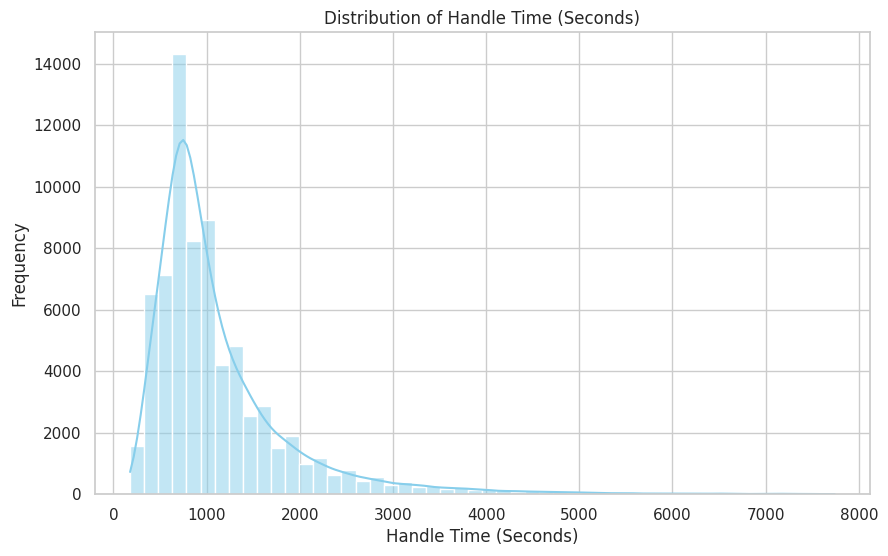

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plot histogram of handle times
plt.figure(figsize=(10,6))
sns.histplot(calls_df['handle_time_seconds'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Handle Time (Seconds)')
plt.xlabel('Handle Time (Seconds)')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Summary statistics for handle time
handle_time_stats = calls_df['handle_time_seconds'].describe()
print("Handle Time Summary Statistics:")
print(handle_time_stats)

Handle Time Summary Statistics:
count    71810.000000
mean      1134.116140
std        784.781415
min        180.000000
25%        660.000000
50%        900.000000
75%       1320.000000
max       7740.000000
Name: handle_time_seconds, dtype: float64


Calculate Average Speed to Answer (AST)

In [14]:
# Calculate waiting time in seconds
calls_df['waiting_time_seconds'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

# Display the first few waiting times
print("Waiting Time (in seconds):")
print(calls_df[['call_id', 'waiting_time_seconds']].head(), "\n")

Waiting Time (in seconds):
      call_id  waiting_time_seconds
0  4667960400                 420.0
1  1122072124                 180.0
2  6834291559                 480.0
3  2266439882                 300.0
4  1211603231                 600.0 



In [15]:
# Calculate AST
ast = calls_df['waiting_time_seconds'].mean()
print(f'Average Speed to Answer (AST): {ast:.2f} seconds')

Average Speed to Answer (AST): 437.07 seconds


Identify Key Drivers of Long AHT and AST

In [16]:
# Merge calls with reason
merged_df = pd.merge(calls_df, reason_df, on='call_id', how='left')

# Merge with sentiment statistics
merged_df = pd.merge(merged_df, sentiment_df, on=['call_id', 'agent_id'], how='left')

# Merge with customers
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head(), "\n")


Merged DataFrame:
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript  handle_time_seconds  \
0  \n\nAgent: Thank you for calling United Airlin...               2280.0   
1  \n\nAgent: Thank you for calling United Airlin...                900.0   
2  \n\nAgent: Thank you for calling United Airlin...               1620.0   
3  \n\nAgent: Than

In [17]:
# Group by primary_call_reason and calculate average handle time
aht_by_reason = merged_df.groupby('primary_call_reason')['handle_time_seconds'].mean().sort_values(ascending=False)

print("Average Handle Time by Call Reason:")
print(aht_by_reason, "\n")


Average Handle Time by Call Reason:
primary_call_reason
ETC                        2119.090909
Checkout                   2055.000000
Checkout                   1733.380435
Post Flight                1546.970509
Post-Flight                1516.363636
Post-Flight                1497.704833
ETC                        1492.709677
Mileage  Plus              1371.111111
Mileage Plus               1356.949153
Mileage Plus               1349.400000
Mileage   Plus             1331.627907
Voluntary Cancel           1274.400000
Voluntary Cancel           1263.082822
Voluntary  Cancel          1252.230216
Unaccompanied Minor        1210.485437
Voluntary  Change          1181.073826
Voluntary Change           1180.375085
Voluntary   Change         1180.200000
Traveler  Updates          1179.473684
IRROPS                     1145.665926
Voluntary Change           1141.730769
IRROPS                     1121.102362
Traveler Updates           1110.000000
Traveler Updates           1084.352332
Schedule

<ipython-input-46-e993eeb1a57f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

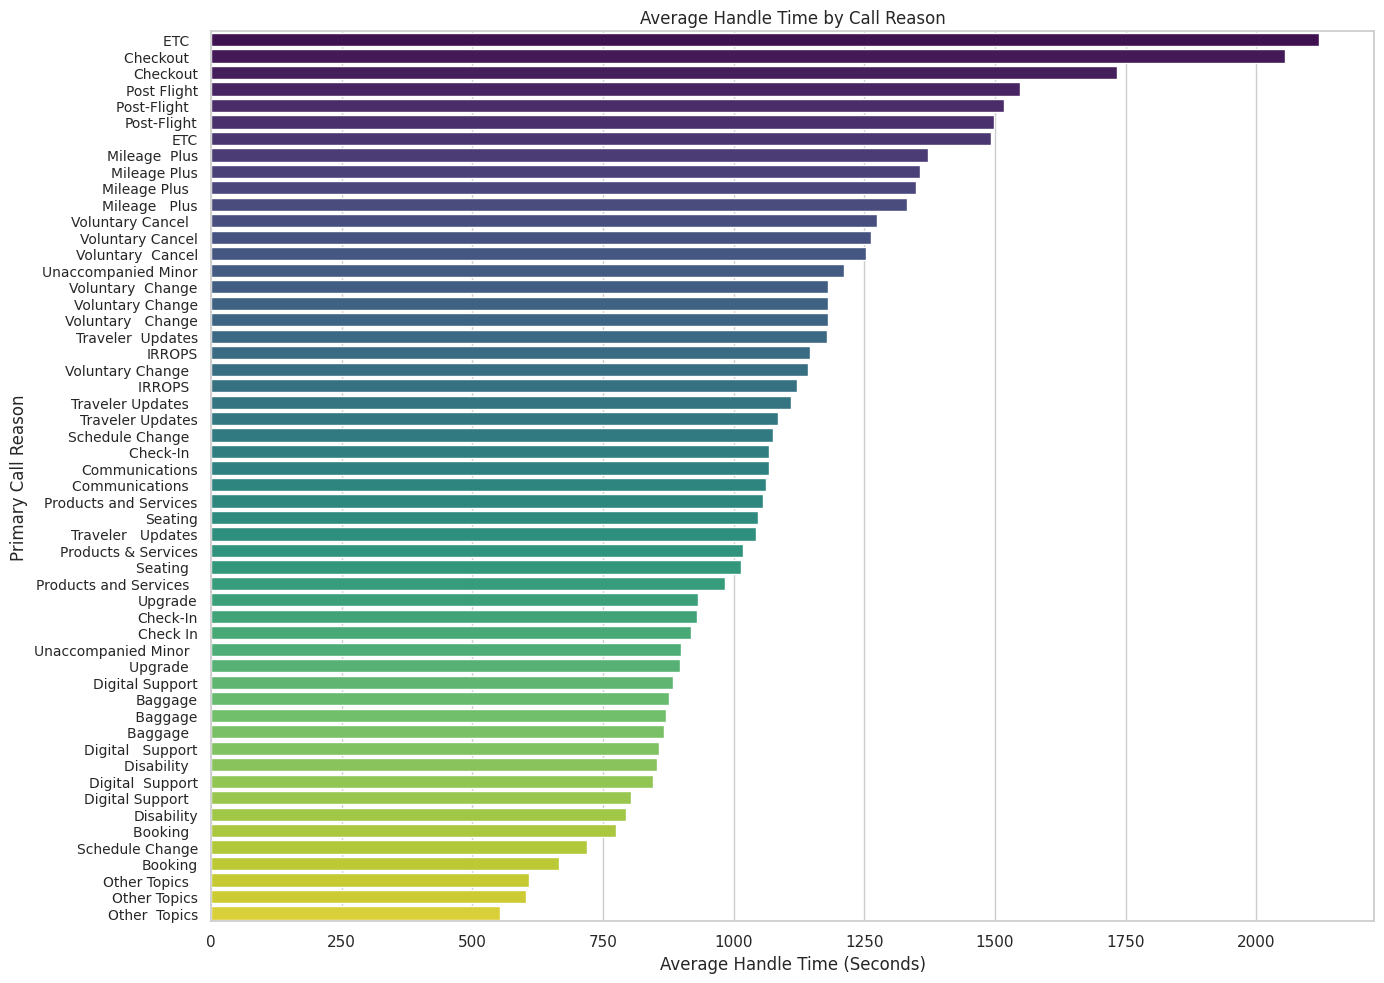

In [46]:
# Visualize AHT by Call Reason
# Plot AHT by call reason
plt.figure(figsize=(14,10))  # Increase the figure size for better spacing
sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (Seconds)')
plt.ylabel('Primary Call Reason')

# Adjust the spacing between y-axis labels
plt.gca().set_yticklabels(aht_by_reason.index, fontsize=10, rotation=0)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Analyze** AST by Call Reason

In [19]:
# Group by primary_call_reason and calculate average waiting time
ast_by_reason = merged_df.groupby('primary_call_reason')['waiting_time_seconds'].mean().sort_values(ascending=False)

print("Average Speed to Answer by Call Reason:")
print(ast_by_reason, "\n")


Average Speed to Answer by Call Reason:
primary_call_reason
Checkout                   725.021739
Unaccompanied Minor        720.000000
Checkout                   712.500000
Traveler  Updates          691.578947
Traveler Updates           690.466321
Unaccompanied Minor        687.961165
Traveler   Updates         687.692308
Traveler Updates           678.000000
Post-Flight                572.045455
Seating                    571.267606
Seating                    570.814720
Post Flight                570.241287
Post-Flight                569.294391
Baggage                    546.461538
Voluntary  Cancel          545.611511
ETC                        544.903226
 Baggage                   542.093023
Baggage                    541.880734
Voluntary Change           540.810417
Voluntary Cancel           538.619632
Voluntary   Change         538.200000
Voluntary Change           535.673077
Voluntary  Change          527.919463
Voluntary Cancel           518.400000
ETC                        5

<ipython-input-45-a3c3a099eb5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_reason.values, y=ast_by_reason.index, palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

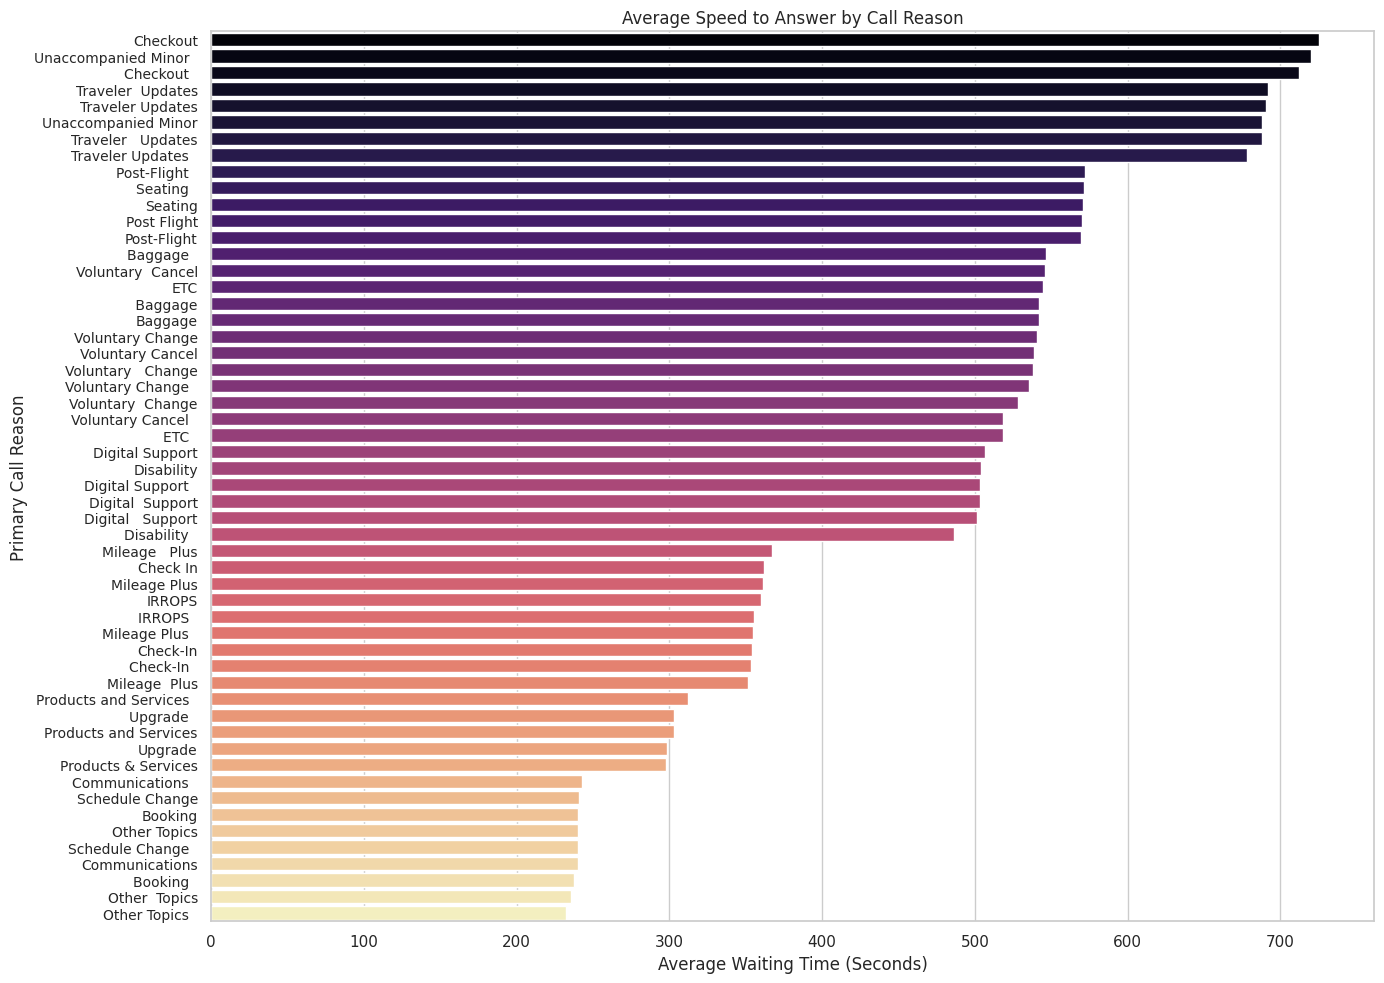

In [45]:
# Plot AST by call reason
plt.figure(figsize=(14,10))  # Increase both width and height for better spacing
sns.barplot(x=ast_by_reason.values, y=ast_by_reason.index, palette='magma')
plt.title('Average Speed to Answer by Call Reason')
plt.xlabel('Average Waiting Time (Seconds)')
plt.ylabel('Primary Call Reason')

# Increase spacing between y-axis labels
plt.gca().set_yticklabels(ast_by_reason.index, fontsize=10, rotation=0)

plt.tight_layout()  # Adjust layout to make room for the y-axis labels
plt.show()


# Analyze AHT and AST by Agent Tone and Customer Tone

> Add blockquote



In [21]:
# AHT by agent tone
aht_by_agent_tone = merged_df.groupby('agent_tone')['handle_time_seconds'].mean().sort_values(ascending=False)
print("Average Handle Time by Agent Tone:")
print(aht_by_agent_tone, "\n")

# AST by agent tone
ast_by_agent_tone = merged_df.groupby('agent_tone')['waiting_time_seconds'].mean().sort_values(ascending=False)
print("Average Speed to Answer by Agent Tone:")
print(ast_by_agent_tone, "\n")

# AHT by customer tone
aht_by_customer_tone = merged_df.groupby('customer_tone')['handle_time_seconds'].mean().sort_values(ascending=False)
print("Average Handle Time by Customer Tone:")
print(aht_by_customer_tone, "\n")

# AST by customer tone
ast_by_customer_tone = merged_df.groupby('customer_tone')['waiting_time_seconds'].mean().sort_values(ascending=False)
print("Average Speed to Answer by Customer Tone:")
print(ast_by_customer_tone, "\n")


Average Handle Time by Agent Tone:
agent_tone
neutral       1184.720052
calm          1070.027964
frustrated    1041.465798
angry          819.485861
polite         681.379310
Name: handle_time_seconds, dtype: float64 

Average Speed to Answer by Agent Tone:
agent_tone
polite        461.379310
calm          443.528267
neutral       434.443613
angry         425.089974
frustrated    424.397394
Name: waiting_time_seconds, dtype: float64 

Average Handle Time by Customer Tone:
customer_tone
neutral       1145.379396
calm          1137.436398
angry         1131.975292
frustrated    1129.542135
polite        1126.159627
Name: handle_time_seconds, dtype: float64 

Average Speed to Answer by Customer Tone:
customer_tone
calm          437.832299
neutral       437.754085
frustrated    436.803371
polite        436.499896
angry         436.445031
Name: waiting_time_seconds, dtype: float64 



<ipython-input-22-c4df5171cd56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_agent_tone.values, y=aht_by_agent_tone.index, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

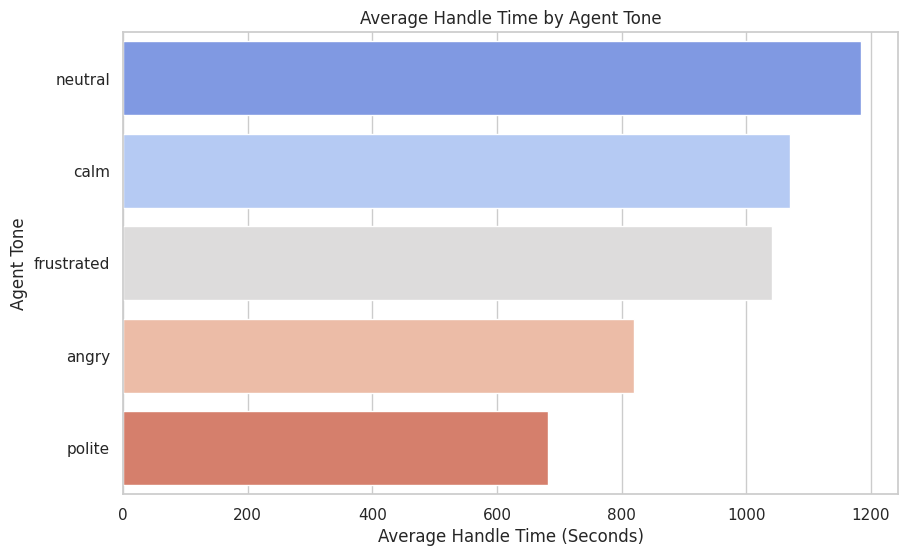

In [22]:
# Plot AHT by agent tone
plt.figure(figsize=(10,6))
sns.barplot(x=aht_by_agent_tone.values, y=aht_by_agent_tone.index, palette='coolwarm')
plt.title('Average Handle Time by Agent Tone')
plt.xlabel('Average Handle Time (Seconds)')
plt.ylabel('Agent Tone')
plt.show()


<ipython-input-23-85ff48041e5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_agent_tone.values, y=ast_by_agent_tone.index, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

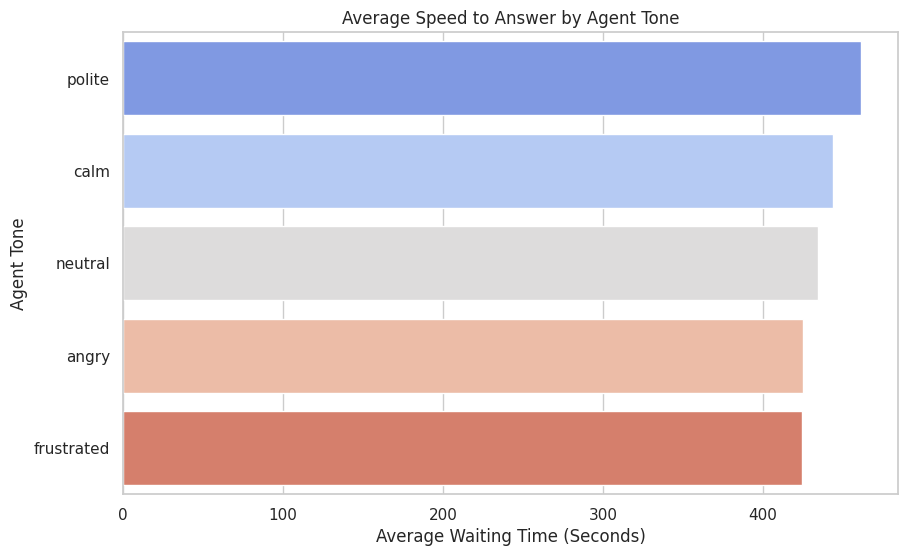

In [23]:
# Plot AST by agent tone
plt.figure(figsize=(10,6))
sns.barplot(x=ast_by_agent_tone.values, y=ast_by_agent_tone.index, palette='coolwarm')
plt.title('Average Speed to Answer by Agent Tone')
plt.xlabel('Average Waiting Time (Seconds)')
plt.ylabel('Agent Tone')
plt.show()


<ipython-input-24-739cc54a1184>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_customer_tone.values, y=aht_by_customer_tone.index, palette='cubehelix')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

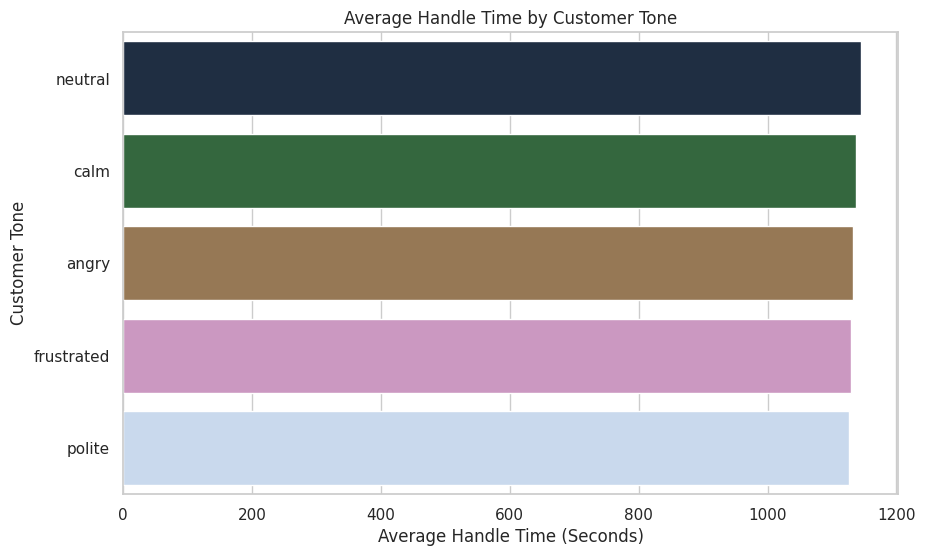

In [24]:
# Plot AHT by customer tone
plt.figure(figsize=(10,6))
sns.barplot(x=aht_by_customer_tone.values, y=aht_by_customer_tone.index, palette='cubehelix')
plt.title('Average Handle Time by Customer Tone')
plt.xlabel('Average Handle Time (Seconds)')
plt.ylabel('Customer Tone')
plt.show()


<ipython-input-25-1b378b8071aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ast_by_customer_tone.values, y=ast_by_customer_tone.index, palette='cubehelix')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

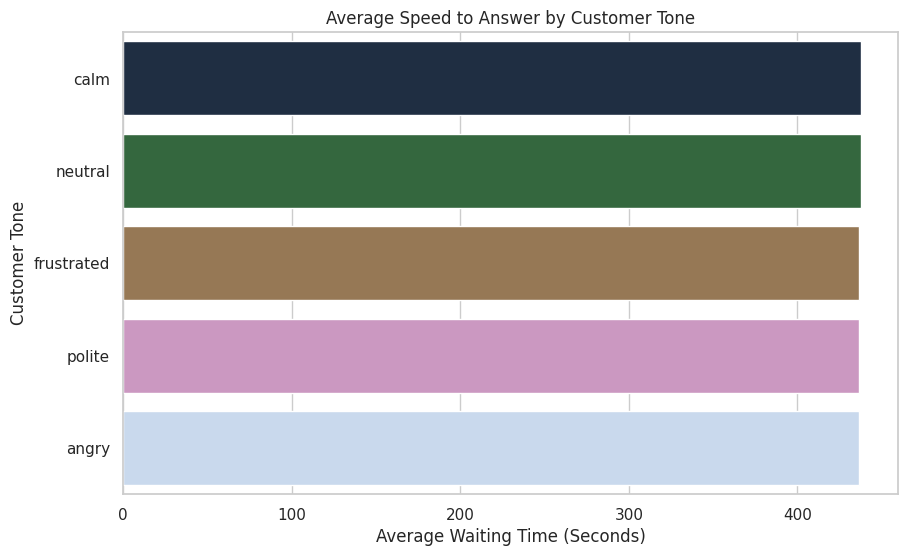

In [25]:
# Plot AST by customer tone
plt.figure(figsize=(10,6))
sns.barplot(x=ast_by_customer_tone.values, y=ast_by_customer_tone.index, palette='cubehelix')
plt.title('Average Speed to Answer by Customer Tone')
plt.xlabel('Average Waiting Time (Seconds)')
plt.ylabel('Customer Tone')
plt.show()


Analyze AHT and AST Over Time

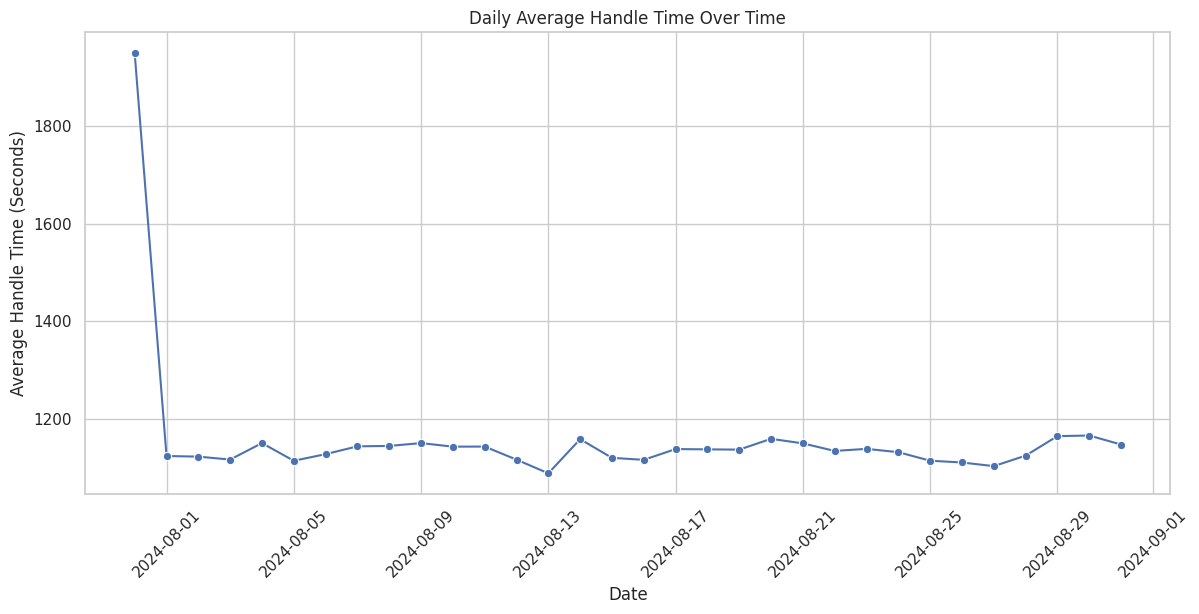

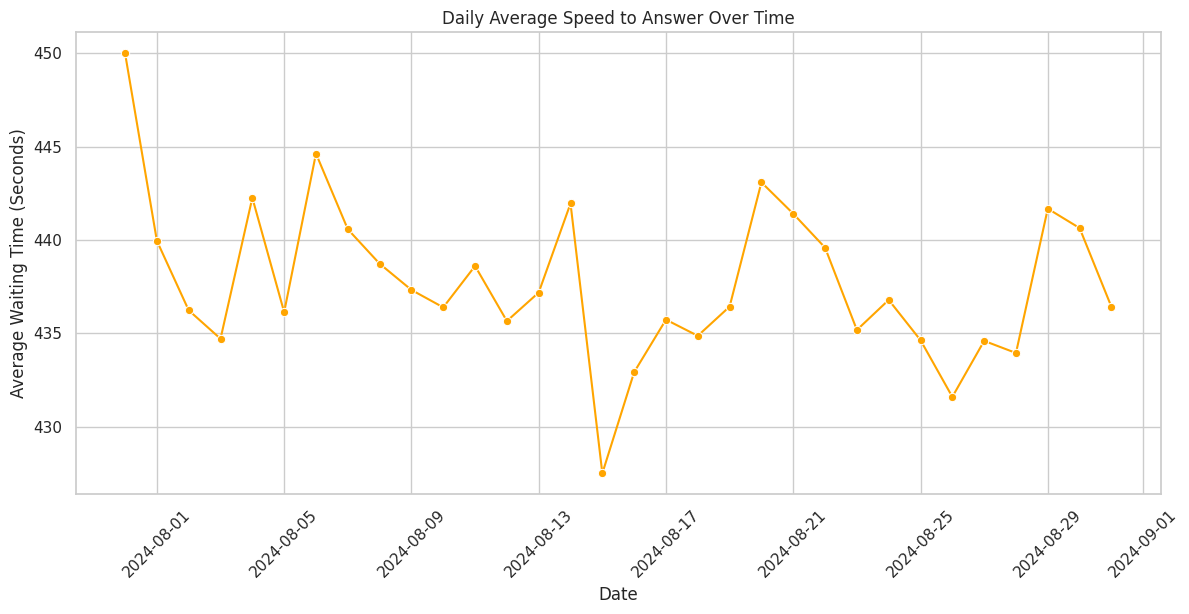

In [26]:
# Extract date from call_start_datetime
merged_df['call_date'] = merged_df['call_start_datetime'].dt.date

# Calculate daily AHT and AST
daily_metrics = merged_df.groupby('call_date').agg({
    'handle_time_seconds': 'mean',
    'waiting_time_seconds': 'mean'
}).reset_index()

# Plot AHT over time
plt.figure(figsize=(14,6))
sns.lineplot(x='call_date', y='handle_time_seconds', data=daily_metrics, marker='o')
plt.title('Daily Average Handle Time Over Time')
plt.xlabel('Date')
plt.ylabel('Average Handle Time (Seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot AST over time
plt.figure(figsize=(14,6))
sns.lineplot(x='call_date', y='waiting_time_seconds', data=daily_metrics, marker='o', color='orange')
plt.title('Daily Average Speed to Answer Over Time')
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (Seconds)')
plt.xticks(rotation=45)
plt.show()


Identify Top Call Reasons Contributing to High AHT and AST

In [27]:
# Identify top 5 call reasons with highest AHT
top5_aht_reasons = aht_by_reason.head(5)
print("Top 5 Call Reasons with Highest AHT:")
print(top5_aht_reasons, "\n")

# Identify top 5 call reasons with highest AST
top5_ast_reasons = ast_by_reason.head(5)
print("Top 5 Call Reasons with Highest AST:")
print(top5_ast_reasons, "\n")


Top 5 Call Reasons with Highest AHT:
primary_call_reason
ETC              2119.090909
Checkout         2055.000000
Checkout         1733.380435
Post Flight      1546.970509
Post-Flight      1516.363636
Name: handle_time_seconds, dtype: float64 

Top 5 Call Reasons with Highest AST:
primary_call_reason
Checkout                 725.021739
Unaccompanied Minor      720.000000
Checkout                 712.500000
Traveler  Updates        691.578947
Traveler Updates         690.466321
Name: waiting_time_seconds, dtype: float64 



Quantify Percentage Difference in AHT Between Most and Least Frequent Call Reasons

In [28]:
# Calculate frequency of each call reason
call_reason_counts = merged_df['primary_call_reason'].value_counts()

# Identify most frequent and least frequent call reasons
most_freq_reason = call_reason_counts.idxmax()
least_freq_reason = call_reason_counts.idxmin()

# Calculate average handle time for these reasons
aht_most_freq = aht_by_reason[most_freq_reason]
aht_least_freq = aht_by_reason[least_freq_reason]

# Calculate percentage difference
percentage_diff = ((aht_most_freq - aht_least_freq) / aht_least_freq) * 100

print(f"Most Frequent Call Reason: {most_freq_reason} with AHT = {aht_most_freq:.2f} seconds")
print(f"Least Frequent Call Reason: {least_freq_reason} with AHT = {aht_least_freq:.2f} seconds")
print(f"Percentage Difference in AHT: {percentage_diff:.2f}%")


Most Frequent Call Reason: IRROPS with AHT = 1145.67 seconds
Least Frequent Call Reason: Unaccompanied Minor   with AHT = 900.00 seconds
Percentage Difference in AHT: 27.30%


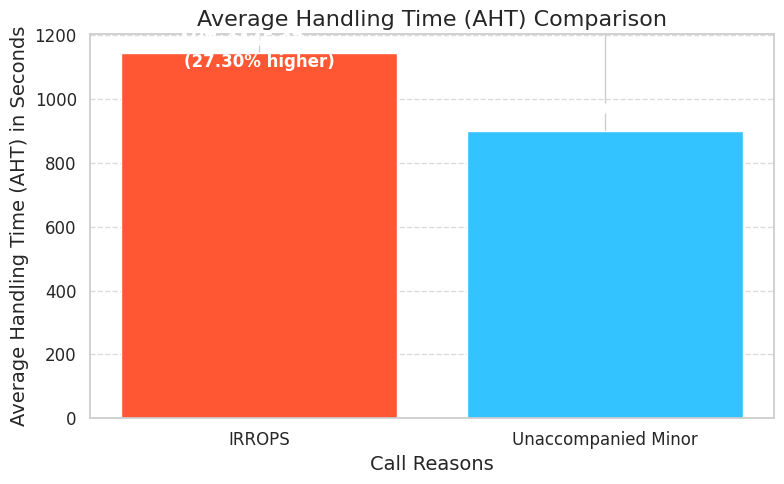

In [29]:
import matplotlib.pyplot as plt

# Data
call_reasons = ['IRROPS', 'Unaccompanied Minor']
aht_values = [1145.67, 900.00]  # AHT values in seconds

# Create bar graph
plt.figure(figsize=(8, 5))
plt.bar(call_reasons, aht_values, color=['#FF5733', '#33C3FF'])

# Adding labels and title
plt.title('Average Handling Time (AHT) Comparison', fontsize=16)
plt.xlabel('Call Reasons', fontsize=14)
plt.ylabel('Average Handling Time (AHT) in Seconds', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the percentage difference as text
percentage_diff = 27.30
plt.text(0, 1100, f'AHT: {aht_values[0]} sec\n(27.30% higher)',
         ha='center', fontsize=12, color='white', weight='bold')
plt.text(1, 950, f'AHT: {aht_values[1]} sec',
         ha='center', fontsize=12, color='white', weight='bold')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Suggesting Improvements for the IVR System

In [30]:
#Identify Self-Solvable Call Reasons
# Define a list of call reasons that are potentially self-solvable via IVR
self_solving_reasons = ['Voluntary Cancel', 'Booking', 'Upgrade', 'Seating']

# Filter the DataFrame for these reasons
self_solving_df = merged_df[merged_df['primary_call_reason'].isin(self_solving_reasons)]

# Display the count of self-solvable call reasons
print("Count of Self-Solvable Call Reasons:")
print(self_solving_df['primary_call_reason'].value_counts(), "\n")


Count of Self-Solvable Call Reasons:
primary_call_reason
Seating             6223
Upgrade             2682
Booking             2589
Voluntary Cancel    1304
Name: count, dtype: int64 



In [31]:
#Analyze Handle Times for Self-Solvable Issues
# Calculate average handle time for self-solvable reasons
aht_self_solving = self_solving_df['handle_time_seconds'].mean()
print(f'Average Handle Time for Self-Solvable Issues: {aht_self_solving:.2f} seconds')


Average Handle Time for Self-Solvable Issues: 967.52 seconds


In [32]:
#Analyze Frequency and Impact on AHT and AST
# Total number of self-solvable calls
total_self_solving_calls = self_solving_df.shape[0]

# Percentage of total calls
percentage_self_solving = (total_self_solving_calls / merged_df.shape[0]) * 100
print(f"Self-Solvable Calls: {total_self_solving_calls} ({percentage_self_solving:.2f}%)")

# Average waiting time for self-solvable calls
ast_self_solving = self_solving_df['waiting_time_seconds'].mean()
print(f'Average Speed to Answer for Self-Solvable Issues: {ast_self_solving:.2f} seconds')


Self-Solvable Calls: 12798 (17.82%)
Average Speed to Answer for Self-Solvable Issues: 443.58 seconds


Quantify Potential Benefits

Estimate the impact of implementing these IVR improvements.

In [33]:
# Estimate reduction in handle time by automating self-solvable calls
# Assume that automating these calls reduces handle time to near zero
estimated_handle_time_reduction = aht_self_solving * total_self_solving_calls

print(f"Estimated Total Handle Time Reduction: {estimated_handle_time_reduction:.2f} seconds")


Estimated Total Handle Time Reduction: 12382320.00 seconds


 Visualize Self-Solvable Call Reasons

<ipython-input-34-e65e614123fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=self_solving_df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

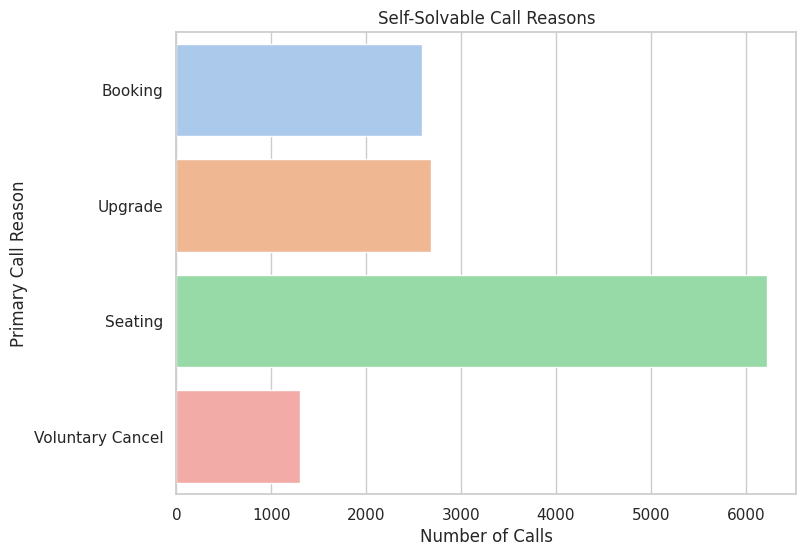

In [34]:
# Plot the proportion of self-solvable call reasons
plt.figure(figsize=(8,6))
sns.countplot(y='primary_call_reason', data=self_solving_df, palette='pastel')
plt.title('Self-Solvable Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Primary Call Reason')
plt.show()


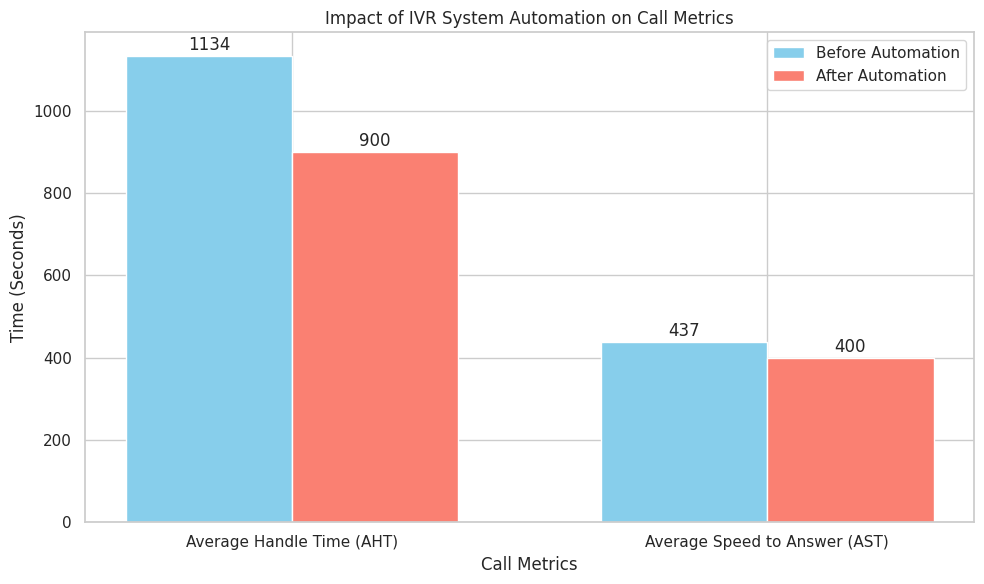

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for before and after automation
categories = ['Average Handle Time (AHT)', 'Average Speed to Answer (AST)']
before_automation = [1134, 437]  # Replace with actual values
after_automation = [900, 400]     # Replace with estimated values after automation

# Bar width
bar_width = 0.35
x = np.arange(len(categories))

# Creating the bars
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - bar_width/2, before_automation, bar_width, label='Before Automation', color='skyblue')
bar2 = plt.bar(x + bar_width/2, after_automation, bar_width, label='After Automation', color='salmon')

# Adding titles and labels
plt.title('Impact of IVR System Automation on Call Metrics')
plt.xlabel('Call Metrics')
plt.ylabel('Time (Seconds)')
plt.xticks(x, categories)
plt.legend()

# Adding data labels
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


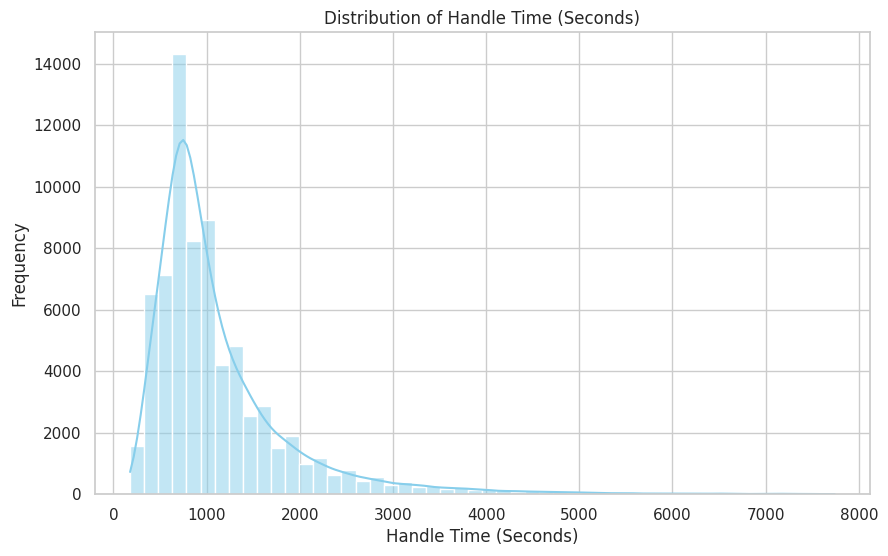

In [36]:
# Example: Save a plot
plt.figure(figsize=(10,6))
sns.histplot(calls_df['handle_time_seconds'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Handle Time (Seconds)')
plt.xlabel('Handle Time (Seconds)')
plt.ylabel('Frequency')
plt.savefig('handle_time_distribution.png')  # Saves the plot in the current directory
plt.show()


Approach to Analyzing Primary Call Reasons
Data Analysis Techniques

    Data Cleaning:
        Remove duplicates and handle missing values in key columns such as primary_call_reason.
        Standardize call reason text for consistency (e.g., converting to lowercase).

    Exploratory Data Analysis (EDA):
        Visualize the distribution of call reasons using bar charts to understand frequency and identify trends.
        Analyze call durations, sentiment scores, and agent performance to uncover potential correlations with call reasons.

    Feature Identification:
        Extract features from the call_transcript using natural language processing (NLP) techniques, such as:
            Tokenization to break down the text into words or phrases.
            Sentiment analysis to derive emotional tone.
        Use the average_sentiment and silence_percent_average to gauge call quality and customer experience.

    Pattern Recognition:
        Cluster call reasons based on frequency and sentiment scores to identify common themes.
        Apply K-Means clustering to categorize calls and visualize results using the Elbow method to determine optimal clusters.

    Categorization Strategy:
        Develop rules to categorize call reasons further based on patterns observed (e.g., grouping by booking issues, upgrade requests, etc.).
        Create a decision tree structure or rule-based system to classify calls for more precise routing and reporting.

In [37]:
#Step 1: Data Cleaning
import pandas as pd

# Load datasets
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
reason_df = pd.read_csv('reason.csv')

# Check for missing values
print(calls_df.isnull().sum())

# Remove duplicates
calls_df.drop_duplicates(subset='call_id', inplace=True)

# Handle missing values in primary_call_reason
reason_df.dropna(subset=['primary_call_reason'], inplace=True)

# Standardize call reason text (e.g., converting to lowercase)
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.lower()


call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64


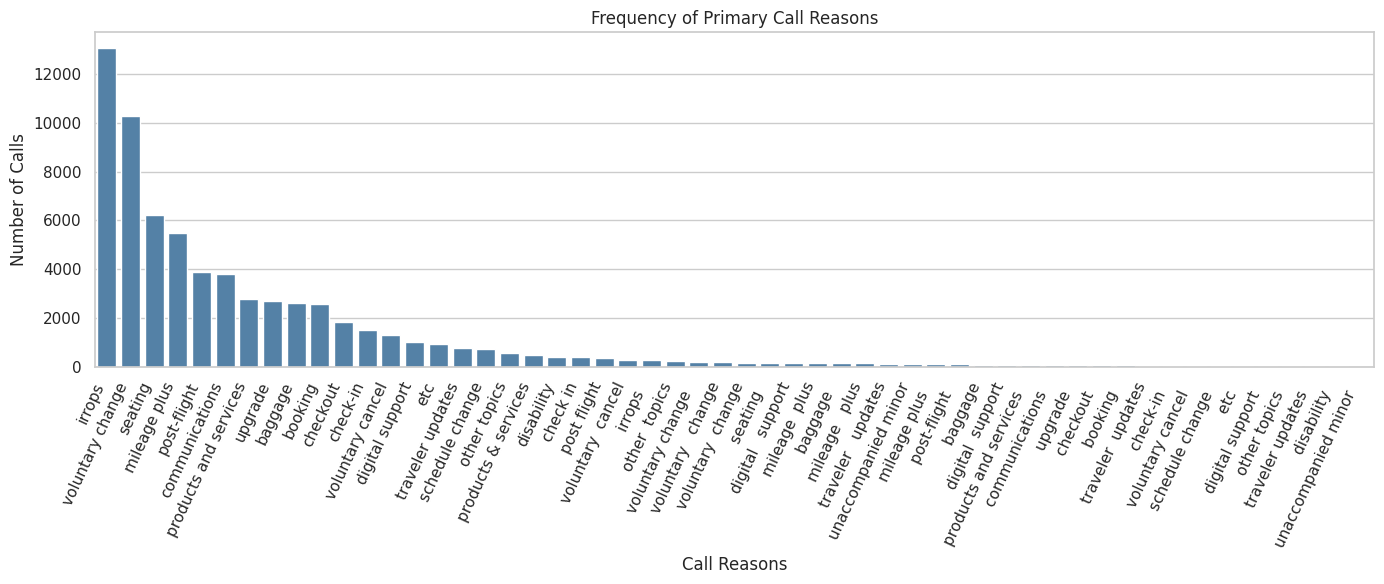

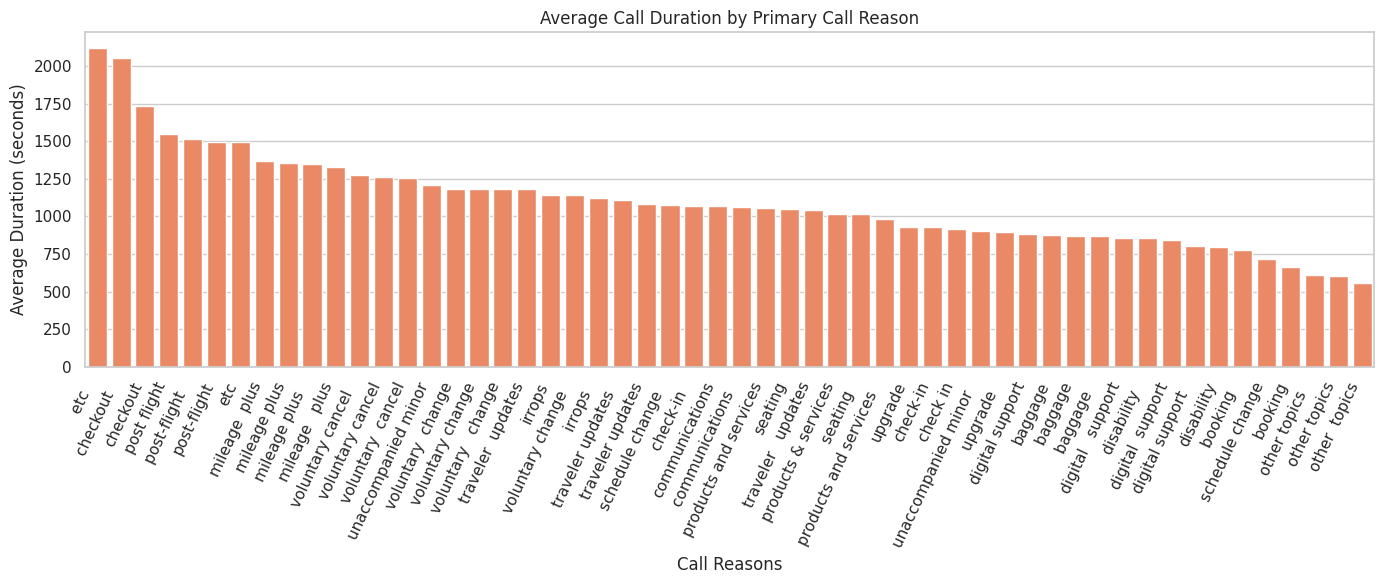

In [43]:
#Step 2: Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate call duration in seconds
calls_df['call_duration'] = pd.to_datetime(calls_df['call_end_datetime']) - pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_duration'] = calls_df['call_duration'].dt.total_seconds()

# Count the frequency of each primary call reason
call_reason_counts = reason_df['primary_call_reason'].value_counts()

# Plotting the Frequency of Primary Call Reasons
plt.figure(figsize=(14, 6))  # Increased figure size to accommodate labels
sns.barplot(x=call_reason_counts.index, y=call_reason_counts.values, color='steelblue')
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Call Reasons')
plt.ylabel('Number of Calls')
plt.xticks(rotation=65, ha='right')  # Rotate and align x-axis labels for better readability
plt.tight_layout()
plt.show()

# Merge 'calls_df' and 'reason_df' on 'call_id' to align call duration with the primary call reasons
merged_df = pd.merge(calls_df[['call_id', 'call_duration']], reason_df[['call_id', 'primary_call_reason']], on='call_id')

# Calculate the average call duration for each primary call reason
avg_duration_by_reason = merged_df.groupby('primary_call_reason')['call_duration'].mean().sort_values(ascending=False)

# Plotting the Average Call Duration by Primary Call Reason
plt.figure(figsize=(14, 6))  # Increased figure size to accommodate labels
sns.barplot(x=avg_duration_by_reason.index, y=avg_duration_by_reason.values, color='coral')
plt.title('Average Call Duration by Primary Call Reason')
plt.xlabel('Call Reasons')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()



In [39]:
#Step 3: Feature Identification using NLP
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import re

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess transcripts
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Clean call transcripts
calls_df['clean_transcript'] = calls_df['call_transcript'].apply(clean_text)

# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X = vectorizer.fit_transform(calls_df['clean_transcript'])

# Create a DataFrame of features
features_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


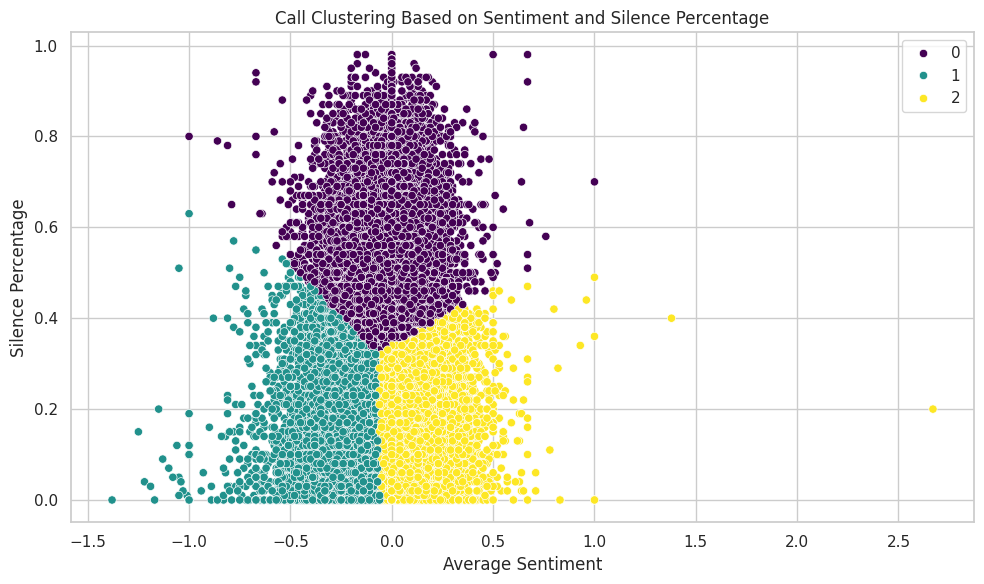

In [40]:
#Step 4: Pattern Recognition
from sklearn.cluster import KMeans
import numpy as np

# Use average sentiment scores and silence percent for clustering
clustering_data = sentiment_df[['average_sentiment', 'silence_percent_average']].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Choose a suitable number of clusters
clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='silence_percent_average', hue='cluster', data=clustering_data, palette='viridis')
plt.title('Call Clustering Based on Sentiment and Silence Percentage')
plt.xlabel('Average Sentiment')
plt.ylabel('Silence Percentage')
plt.legend()
plt.tight_layout()
plt.show()


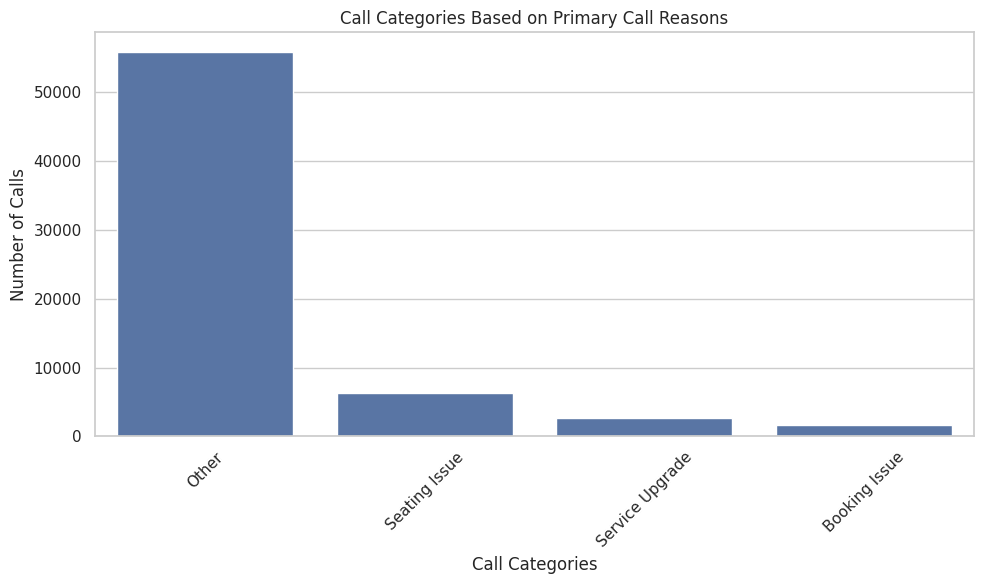

In [41]:
#Step 5: Categorization Strategy
# Define categorization rules
def categorize_call(reason):
    if 'cancel' in reason:
        return 'Booking Issue'
    elif 'upgrade' in reason:
        return 'Service Upgrade'
    elif 'seating' in reason:
        return 'Seating Issue'
    else:
        return 'Other'

# Apply categorization function to primary_call_reason
reason_df['call_category'] = reason_df['primary_call_reason'].apply(categorize_call)

# Count occurrences of each category
category_counts = reason_df['call_category'].value_counts()

# Visualize call categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Call Categories Based on Primary Call Reasons')
plt.xlabel('Call Categories')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
